<a href="https://colab.research.google.com/github/shellylin100/Fake_Real_news_classifier/blob/main/Fake_and_real_news_classification_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instruction**
- Kaggle dataset: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

- Instruction:
  - Train **3** binary text-classfication models to detect Fake/True news, you are free to use
Any text processing/feature-engineering setup: Bag-of-words, TF-iDF, pretrained, FastText, GloVe, BERT, XLNET, RoBERTa, etc.
  - Any algorithms: XGBoost, LightGBM, CNN, LSTM, etc.
Sample your own train and test set, and report **test-set's F1 scores and accuracy** for each of your models.
  - Add a summary section to describe why you chose to train those models, and which is the most preferred.


-----

# **Business Understanding & Problem Statement**
News is an important media for people to understand what's going on in the world. True or Fake news could then affect people's perception on things. To be able to properly identify Fake news is critical for proper information delivery

# **Objective**
Build a news classifier to classify news into real or fake news

# **Package Handling and Data Import**

In [ ]:
# google drive related package
import os

# Data import and wranggling, calculations
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Import Scikit-learn related libraries
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
import datetime

# nltk related libraries 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# text clearning 
import re
import string

# gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# wordcloud
from wordcloud import WordCloud

# Display setting
pd.set_option('max_colwidth', None)

#Disable the warnings
import warnings
warnings.filterwarnings('ignore')

#timestamp to calculate total runtime
import timeit
start_time = timeit.default_timer() 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# **Data IO**
## Load data
1. from google drive
2. If the data is in local device / same folder, please run below code instead

> df_fake = pd.read_csv('./Fake.csv)

> df_true = pd.read_csv('./True.csv)
## Data 
3. Two csv files: df_fake & df_real
4. 23,481 fake news & 21,417 real news
5. Both data have 4 Columns
  - title: news headlines
  - text: news content/article
  - subject: type of news
  - date: date when the news was published

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
# Change to your own directory
try:
  os.chdir("/content/drive/MyDrive")
  print("Directory changed")
except OSError:
  print("Error: Can't change the Current Working Directory")

Directory changed


In [ ]:
df_fake = pd.read_csv('/content/drive/MyDrive/Part_2_fake_true_news_classifier/Fake.csv')
df_fake.head(1)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,"December 31, 2017"


In [ ]:
df_true = pd.read_csv('/content/drive/MyDrive/Part_2_fake_true_news_classifier/True.csv')
df_true.head(1)

title  ...                date
0  As U.S. budget fight looms, Republicans flip their fiscal script  ...  December 31, 2017 

[1 rows x 4 columns]

In [ ]:
print('\033[1m', "Info on df_fake data", '\033[0m')
print('')
display(df_fake.info())
print('')
print('\033[1m', "Info on df_true data", '\033[0m')
print('')
df_true.info()

 Info on df_fake data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


None


 Info on df_true data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
print('\033[1m', "df_fake shape:", '\033[0m', df_fake.shape)
print('\033[1m', "df_true shape:", '\033[0m', df_true.shape)

 df_fake shape:  (23481, 4)
 df_true shape:  (21417, 4)


# **Check for missing values**
- No missing values on both df_fake and df_true dataset

In [ ]:
print('\033[1m', "Check if any missing values on df_fake data", '\033[0m')
print('')
display(df_fake.isnull().any())
print('')
print('\033[1m', "Check if any missing values on df_true data", '\033[0m')
print('')
df_true.isnull().any()

 Check if any missing values on df_fake data 



title      False
text       False
subject    False
date       False
dtype: bool


 Check if any missing values on df_true data 



title      False
text       False
subject    False
date       False
dtype: bool

In [ ]:
df_fake['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [ ]:
df_true['text'][0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

# Value counts of each columns
Look into unique values in each columns and top 9 unique values content of both Real and Fake datasets

In [ ]:
for column in df_fake.columns:
  uniques = sorted(df_fake[column].unique())
  print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:9])

title                17903	 ['\r\r\r\r\r\r\r\nDonald Trump Gets His A** Handed To Him By A 10-Year-Old Girl (VIDEO)\r\r\r\r\r\r\r\n', '\r\r\r\r\r\r\r\nEx-GOP Congressman Shreds Fellow Republicans For Not ‘Howling’ For Trump’s Impeachment (VIDEO)\r\r\r\r\r\r\r\n', '\r\r\r\r\r\r\r\nTrump Gets STOMPED For Whining About President Obama Using Air Force One On Campaign Trail\r\r\r\r\r\r\r\n', '\r\r\r\r\r\r\r\nWATCH: Democratic Rep Delivers Scathing Rebuke Of Trumpcare Bill To Thunderous Applause On House Floor\r\r\r\r\r\r\r\n', ' #AfterTrumpImplodes Hashtag Hilariously Imagines What Will Happen In A Post-Trump World', ' #BlackLivesMatter Leader To Run For Mayor Of Racially Troubled Baltimore (TWEET)', ' #BringBackObama Hashtag Blows Up On Twitter As Americans Share Memories (TWEETS)', ' #FreeChrisChristie: Twitter Reacts To The ‘Hostage Situation’ At Trump’s Speech (TWEETS)', ' #MakeAmericaBrannigan: Futurama Voice Actor Reads Trump’s Most Infamous Quotes (TWEETS)']
text                 1745

In [ ]:
for column in df_true.columns:
  uniques = sorted(df_true[column].unique())
  print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:9])

title                20826	 ['"It would be huge": U.S. border town confronts possible import tax', '"Make Republicans Whole Again!" A divided party struggles to rally behind Trump', '"Nobody stood with the Kurds" says bitter Barzani', '"The people have spoken," Zimbabwe\'s Mnangagwa tells cheering crowd', '"The people have spoken," says Zimbabwe\'s new leader', '"You are the light" - Philippines\' Duterte croons at Trump\'s request', "'A better future' - Britain's May tries to rally her Conservatives", "'A difficult life': As refugee arrivals to Greece pick up, misery grows", "'A long way to go' in German coalition talks, liberal FDP says"]
text                 21192	 [' ', ' ((In March 30 item, corrects spelling of Kislyak in paragraph 3)) WASHINGTON (Reuters) - Donald Trump’s former national security adviser, Michael Flynn, has offered to testify before congressional committees probing potential ties between the Trump campaign and Russia but wants protection against “unfair prosecuti

# **Merge the 2 datasets & Add `target` column**

| **target label** | **Shape** |
|:-----|:----:|
| df_true =  1 | (21417, 4) | 
| df_fake = 0 | (23481, 4) |


In [ ]:
# Create target column. True news label 1, False news label 0
df_true['target'] = 1
df_fake['target'] = 0

In [ ]:
# Append two datasets into df dataframe
df = pd.concat([df_true, df_fake], axis = 0, ignore_index = True)

In [ ]:
print(f"shape of df: {df.shape}")

shape of df: (44898, 5)


In [ ]:
df.head(1)

title  ... target
0  As U.S. budget fight looms, Republicans flip their fiscal script  ...      1

[1 rows x 5 columns]

In [ ]:
# Shuffle the data so the fake and true data are well-mixed
df = shuffle(df, random_state = 42).reset_index(drop = True)
df.head(1)

,title,text,subject,date,target
0,"BREAKING: GOP Chairman Grassley Has Had Enough, DEMANDS Trump Jr. Testimony","Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour, and they refuse to acknowledge that there are problems surrounding all of this. To them, it s fake news, or a hoax. However, the facts bear things out differently, and it seems that there are now cracks in the Congressional public leadership.Chuck Grassley (R-Iowa), who heads the Senate Judiciary Committee, is fed up. He is now demanding that Donald Trump, Jr. and former 2016 Trump Campaign Manager Paul Manafort testify before his committee regarding the now infamous shady meeting between Donald Trump and the shady Russian lawyer who promised dirt on 2016 Democratic Presidential nominee Hillary Clinton. In fact, this information is due, well, NOW. This demand sends a few signals to team Trump most notably that they should not fire Special Counsel Robert Mueller under any circumstances, despite the fact that it seems that this seems to be what Trump s White House is laying the groundwork, so to speak, to do as we speak.Here is the tweet regarding Grassley s warning:Also, anyone who thinks that Senator Grassley and the rest of the Senate are not serious about this only needs to look at the warning that has already been given: Trump Jr. and Manafort will either follow orders, or be served with subpoenas that force them to comply. If they refuse, they will be held in contempt of Congress, which carries with it serious jail time.Even the cruel, craven creatures within the GOP are sick of Donald Trump s corruption and his scandal-ridden White House. They are angry that he staged a hostile takeover of their party, first with birtherism and giving them a permanently racist label all while decimating all efforts that were made to pretend the Republican Party isn t a hotbed of racism, and while turning their worlds upside down, and with it, the nation. It seems that old-timers like Grassley, who are clearly sick of Trump s bullshit, just might be the ones who could save the republic. All they need is a bit of courage.Featured image via Win McNamee/Getty Images",News,"July 21, 2017",0


# **Exploratory Data Analysis (EDA)**
- Distribution of Target and Subject column

## Distribution of Target column

Text(0.5, 1.0, 'Target Distribution')

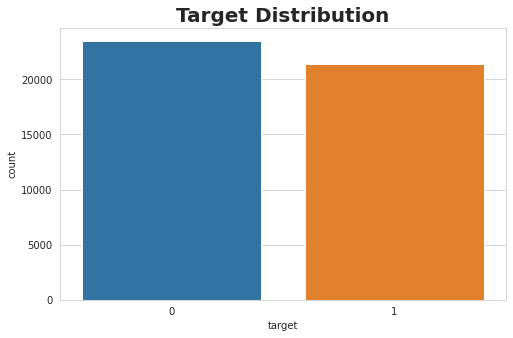

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.countplot(df['target'])
plt.title("Target Distribution", fontsize = 20, fontweight = "bold")

## Distribution of Subject column
- Insight: There seems to be **NO** overlapping subjects between Fake and Real
  - `Fake` news cover all topics except Politics & World news, include News, Politics, Government news, left-news, middle-east, US-news
  - `Real` news cover only Politic news & World News

subject          target
politicsNews     1         11272
worldnews        1         10145
News             0          9050
politics         0          6841
left-news        0          4459
Government News  0          1570
US_News          0           783
Middle-east      0           778
Name: target, dtype: int64


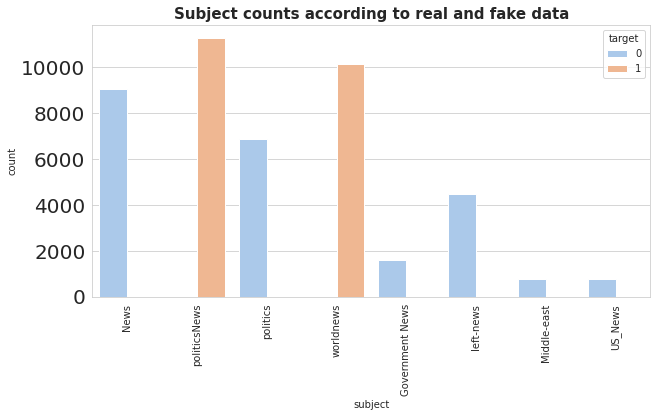

In [ ]:
# Subject distribution
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 90)
sns.countplot(x = "subject", hue = "target", data = df, palette = "pastel")
plt.title("Subject counts according to real and fake data", fontsize=15, fontweight="bold")
plt.yticks(fontsize=20)

print(df.groupby(['subject','target'])['target'].size().sort_values(ascending=False))

# **Data Cleaning** 
- Drop `date`, `Subject` column
  - reason: No overlapping subject
- Combine `Title` and `Text` to `Text` column 

In [ ]:
# Drop date, subject columns
df.drop(['date', 'subject'], axis = 1, inplace = True)

In [ ]:
# Concatenate title and text into text column
df['text'] = df['title'] + df['text']
df.drop('title', axis = 1, inplace = True)

In [ ]:
df.head(1)

,text,target
0,"BREAKING: GOP Chairman Grassley Has Had Enough, DEMANDS Trump Jr. TestimonyDonald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour, and they refuse to acknowledge that there are problems surrounding all of this. To them, it s fake news, or a hoax. However, the facts bear things out differently, and it seems that there are now cracks in the Congressional public leadership.Chuck Grassley (R-Iowa), who heads the Senate Judiciary Committee, is fed up. He is now demanding that Donald Trump, Jr. and former 2016 Trump Campaign Manager Paul Manafort testify before his committee regarding the now infamous shady meeting between Donald Trump and the shady Russian lawyer who promised dirt on 2016 Democratic Presidential nominee Hillary Clinton. In fact, this information is due, well, NOW. This demand sends a few signals to team Trump most notably that they should not fire Special Counsel Robert Mueller under any circumstances, despite the fact that it seems that this seems to be what Trump s White House is laying the groundwork, so to speak, to do as we speak.Here is the tweet regarding Grassley s warning:Also, anyone who thinks that Senator Grassley and the rest of the Senate are not serious about this only needs to look at the warning that has already been given: Trump Jr. and Manafort will either follow orders, or be served with subpoenas that force them to comply. If they refuse, they will be held in contempt of Congress, which carries with it serious jail time.Even the cruel, craven creatures within the GOP are sick of Donald Trump s corruption and his scandal-ridden White House. They are angry that he staged a hostile takeover of their party, first with birtherism and giving them a permanently racist label all while decimating all efforts that were made to pretend the Republican Party isn t a hotbed of racism, and while turning their worlds upside down, and with it, the nation. It seems that old-timers like Grassley, who are clearly sick of Trump s bullshit, just might be the ones who could save the republic. All they need is a bit of courage.Featured image via Win McNamee/Getty Images",0


# Data Pre-process to clean the Text

1.   Remove punctuation marks
2.   Remove stopwords
3.   Remove single-characer words

Remove punctuation marks could make the text be more clean and easier for the later vectorization steps before fitting the data into the model

Many un-important words are in the text which does not help with the classifier's prediction, these are called stopped words. 

Single character words usually have no meaning like a, b so remove it

In [ ]:
# News punctuation cleaning
def punctuation_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df['text'] = df['text'].apply(punctuation_cleaning)

In [ ]:
df.head(1)

,text,target
0,breaking gop chairman grassley has had enough demands trump jr testimonydonald trump s white house is in chaos and they are trying to cover it up their russia problems are mounting by the hour and they refuse to acknowledge that there are problems surrounding all of this to them it s fake news or a hoax however the facts bear things out differently and it seems that there are now cracks in the congressional public leadershipchuck grassley riowa who heads the senate judiciary committee is fed up he is now demanding that donald trump jr and former trump campaign manager paul manafort testify before his committee regarding the now infamous shady meeting between donald trump and the shady russian lawyer who promised dirt on democratic presidential nominee hillary clinton in fact this information is due well now this demand sends a few signals to team trump most notably that they should not fire special counsel robert mueller under any circumstances despite the fact that it seems that this seems to be what trump s white house is laying the groundwork so to speak to do as we speakhere is the tweet regarding grassley s warningalso anyone who thinks that senator grassley and the rest of the senate are not serious about this only needs to look at the warning that has already been given trump jr and manafort will either follow orders or be served with subpoenas that force them to comply if they refuse they will be held in contempt of congress which carries with it serious jail timeeven the cruel craven creatures within the gop are sick of donald trump s corruption and his scandalridden white house they are angry that he staged a hostile takeover of their party first with birtherism and giving them a permanently racist label all while decimating all efforts that were made to pretend the republican party isn t a hotbed of racism and while turning their worlds upside down and with it the nation it seems that oldtimers like grassley who are clearly sick of trump s bullshit just might be the ones who could save the republic all they need is a bit of couragefeatured image via win mcnameegetty images,0


In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def remove_stop_words(text):
  """
  A simple function to clean the stop words

  """
  result = []
  for token in gensim.utils.simple_preprocess(text):
      if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
          result.append(token)
            
  return result

In [ ]:
df['clean_text'] = df['text'].apply(remove_stop_words)
df['cleaned_joined_text']= df['clean_text'].apply(lambda x:" ".join(x))

In [ ]:
df.head(1)

,text,target,clean_text,cleaned_joined_text
0,breaking gop chairman grassley has had enough demands trump jr testimonydonald trump s white house is in chaos and they are trying to cover it up their russia problems are mounting by the hour and they refuse to acknowledge that there are problems surrounding all of this to them it s fake news or a hoax however the facts bear things out differently and it seems that there are now cracks in the congressional public leadershipchuck grassley riowa who heads the senate judiciary committee is fed up he is now demanding that donald trump jr and former trump campaign manager paul manafort testify before his committee regarding the now infamous shady meeting between donald trump and the shady russian lawyer who promised dirt on democratic presidential nominee hillary clinton in fact this information is due well now this demand sends a few signals to team trump most notably that they should not fire special counsel robert mueller under any circumstances despite the fact that it seems that this seems to be what trump s white house is laying the groundwork so to speak to do as we speakhere is the tweet regarding grassley s warningalso anyone who thinks that senator grassley and the rest of the senate are not serious about this only needs to look at the warning that has already been given trump jr and manafort will either follow orders or be served with subpoenas that force them to comply if they refuse they will be held in contempt of congress which carries with it serious jail timeeven the cruel craven creatures within the gop are sick of donald trump s corruption and his scandalridden white house they are angry that he staged a hostile takeover of their party first with birtherism and giving them a permanently racist label all while decimating all efforts that were made to pretend the republican party isn t a hotbed of racism and while turning their worlds upside down and with it the nation it seems that oldtimers like grassley who are clearly sick of trump s bullshit just might be the ones who could save the republic all they need is a bit of couragefeatured image via win mcnameegetty images,0,"[breaking, gop, chairman, grassley, demands, trump, testimonydonald, trump, white, house, chaos, trying, cover, russia, problems, mounting, hour, refuse, acknowledge, problems, surrounding, fake, news, hoax, facts, bear, things, differently, cracks, congressional, public, leadershipchuck, grassley, riowa, heads, senate, judiciary, committee, fed, demanding, donald, trump, trump, campaign, manager, paul, manafort, testify, committee, infamous, shady, meeting, donald, trump, shady, russian, lawyer, promised, dirt, democratic, presidential, nominee, hillary, clinton, fact, information, demand, sends, signals, team, trump, notably, special, counsel, robert, mueller, circumstances, despite, fact, trump, white, house, laying, groundwork, speak, speakhere, tweet, grassley, warningalso, thinks, senator, grassley, rest, senate, needs, look, warning, given, trump, manafort, ...]",breaking gop chairman grassley demands trump testimonydonald trump white house chaos trying cover russia problems mounting hour refuse acknowledge problems surrounding fake news hoax facts bear things differently cracks congressional public leadershipchuck grassley riowa heads senate judiciary committee fed demanding donald trump trump campaign manager paul manafort testify committee infamous shady meeting donald trump shady russian lawyer promised dirt democratic presidential nominee hillary clinton fact information demand sends signals team trump notably special counsel robert mueller circumstances despite fact trump white house laying groundwork speak speakhere tweet grassley warningalso thinks senator grassley rest senate needs look warning given trump manafort follow orders served subpoenas force comply refuse held contempt congress carries jail timeeven cruel craven creatures gop sick donald trump corruption scandalridden white

## Number of characters in texts
- Fake text have some texts with high number of characters
- The distribution of both are very skewed with long tails
  - 2500 characters in text is the most common in true news 
  - 5000 characters in text is the most common in fake text

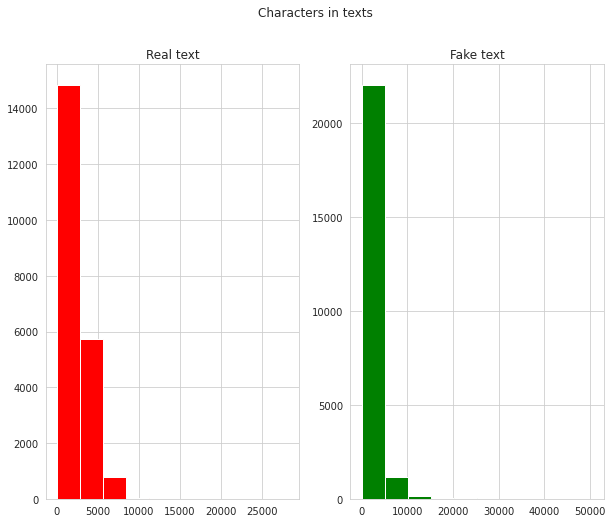

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,8))
text_len=df[df['target']== 1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Real text')
text_len=df[df['target']== 0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

## Average word length in a text
- `Fake news` and `Real news` word length seem to both have normal distribution

Text(0.5, 0.98, 'Average word length in each text')

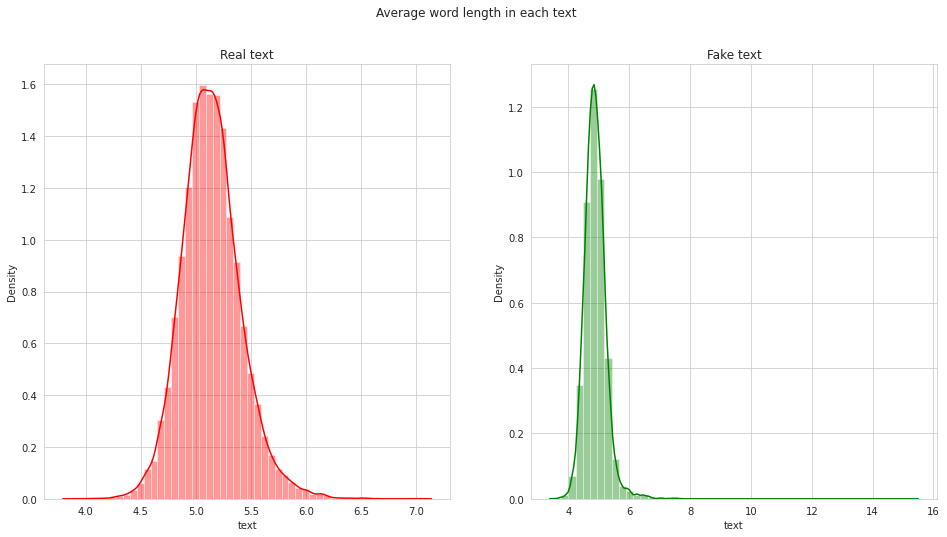

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
word = df[df['target']== 1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax = ax1, color ='red')
ax1.set_title('Real text')

word = df[df['target']== 0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax = ax2, color ='green')
ax2.set_title('Fake text')

fig.suptitle('Average word length in each text')

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.cleaned_joined_text)
corpus[:5]

['breaking', 'gop', 'chairman', 'grassley', 'demands']

In [ ]:
df[df['target']== 1].head(1)

,text,target,clean_text,cleaned_joined_text
3,california ag pledges to defend birth control insurance coveragesan francisco reuters california attorney general xavier becerra said on friday he was “prepared to take whatever action it takes” to defend the obamacare mandate that health insurers provide birth control now that the trump administration has moved to circumvent it the administration’s new contraception exemptions “are another example of the trump administration trampling on people’s rights but in this case only women” becerra told reuters becerra and other democratic attorneys general have filed courtroom challenges to other trump administration policies involving healthcare immigration and the environment,1,"[california, pledges, defend, birth, control, insurance, coveragesan, francisco, reuters, california, attorney, general, xavier, becerra, said, friday, prepared, action, takes, defend, obamacare, mandate, health, insurers, provide, birth, control, trump, administration, moved, circumvent, administration, new, contraception, exemptions, example, trump, administration, trampling, people, rights, case, women, becerra, told, reuters, becerra, democratic, attorneys, general, filed, courtroom, challenges, trump, administration, policies, involving, healthcare, immigration, environment]",california pledges defend birth control insurance coveragesan francisco reuters california attorney general xavier becerra said friday prepared action takes defend obamacare mandate health insurers provide birth control trump administration moved circumvent administration new contraception exemptions example trump administration trampling people rights case women becerra told reuters becerra democratic attorneys general filed courtroom challenges trump administration policies involving healthcare immigration environment


## Unigram Analysis of all the text
- Top 10 words being used
- When we look at unigram analysis, many words appear to be together, therefore, also do a bi-gram and tri-gram plot. However it takes long time to run, i've commented it out, but feel free to un-comment it to run

In [ ]:
def get_top_text_ngrams(corpus, n, g):
  """
  A simple function to get the top counted text combination

  """
  vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

['clinton',
 'government',
 'house',
 'new',
 'obama',
 'people',
 'president',
 'said',
 'state',
 'trump']

Text(0.5, 1.0, 'Unigram count')

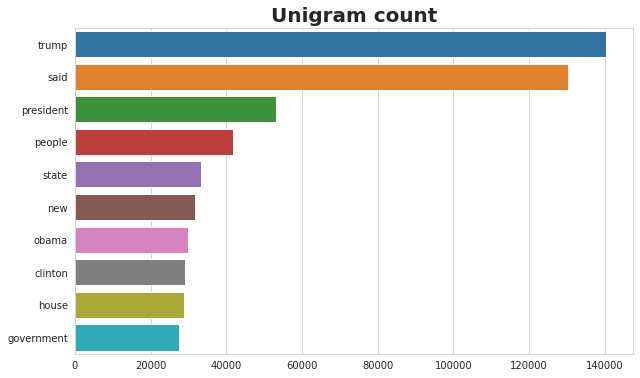

In [ ]:
# Unigram Count
plt.figure(figsize = (10,6))
most_common_uni = get_top_text_ngrams(df.cleaned_joined_text,10,1)
most_common_uni = dict(most_common_uni)
display(sorted(most_common_uni))
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))
plt.title("Unigram count", fontsize = 20, fontweight = "bold")

## Bigram & Trigram plot Analysis for top 10 combination of 2 words

{'barack obama': 5603,
 'donald trump': 25061,
 'hillary clinton': 9540,
 'new york': 8110,
 'north korea': 7053,
 'president donald': 6932,
 'prime minister': 4753,
 'trump said': 5029,
 'united states': 18394,
 'white house': 15486}

{'black lives matter': 1442,
 'donald trump realdonaldtrump': 1790,
 'new york city': 1006,
 'new york times': 2034,
 'president barack obama': 3735,
 'president donald trump': 6808,
 'president united states': 1097,
 'presidentelect donald trump': 1043,
 'reuters president donald': 1476,
 'white house said': 1052}

Text(0.5, 1.0, 'Trigram count')

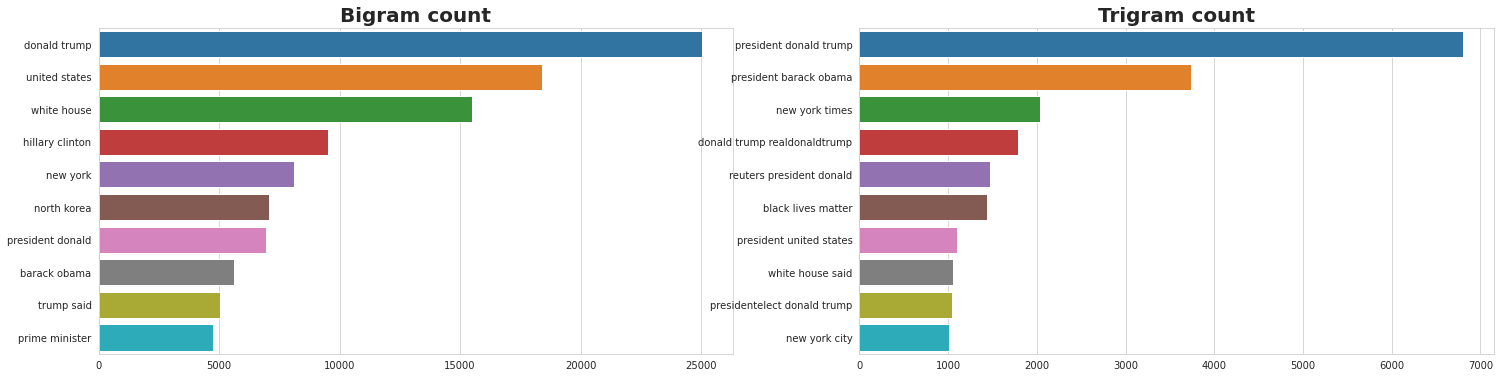

In [ ]:
# This takes long time to run so comment it out. if would like to see, feel free to un-comment it
# plt.figure(figsize=(25, 6))
# plt.subplot(1, 2, 1)
# most_common_bi = get_top_text_ngrams(df.cleaned_joined_text,10,2)
# most_common_bi = dict(most_common_bi)
# display(most_common_bi)
# sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
# plt.title("Bigram count", fontsize = 20, fontweight = "bold")

# plt.subplot(1, 2, 2)     
# most_common_three = get_top_text_ngrams(df.cleaned_joined_text,10,3)
# most_common_three = dict(most_common_three)
# display(most_common_three)
# sns.barplot(x=list(most_common_three.values()),y=list(most_common_three.keys()))
# plt.title("Trigram count", fontsize = 20, fontweight = "bold")

## Final data cleaning before seperating data into train and test

In [ ]:
# Remove text (original), clean_text and rename cleaned_joined_text column as text for further process  
df = df.drop(columns = ['clean_text','text']).rename(columns = {"cleaned_joined_text":"text"})

In [ ]:
df.head(1)

,target,text
0,0,breaking gop chairman grassley demands trump testimonydonald trump white house chaos trying cover russia problems mounting hour refuse acknowledge problems surrounding fake news hoax facts bear things differently cracks congressional public leadershipchuck grassley riowa heads senate judiciary committee fed demanding donald trump trump campaign manager paul manafort testify committee infamous shady meeting donald trump shady russian lawyer promised dirt democratic presidential nominee hillary clinton fact information demand sends signals team trump notably special counsel robert mueller circumstances despite fact trump white house laying groundwork speak speakhere tweet grassley warningalso thinks senator grassley rest senate needs look warning given trump manafort follow orders served subpoenas force comply refuse held contempt congress carries jail timeeven cruel craven creatures gop sick donald trump corruption scandalridden white house angry staged hostile takeover party birtherism giving permanently racist label decimating efforts pretend republican party hotbed racism turning worlds upside nation oldtimers like grassley clearly sick trump bullshit ones save republic need bit couragefeatured image win mcnameegetty images


In [ ]:
print('Maximum review length: {}'.format(
len(max((df.text), key=len))))

print('Minimum review length: {}'.format(
len(min((df.text), key=len))))

Maximum review length: 36102
Minimum review length: 0


## Word Map of **Real** Texts **after** remove stopwords


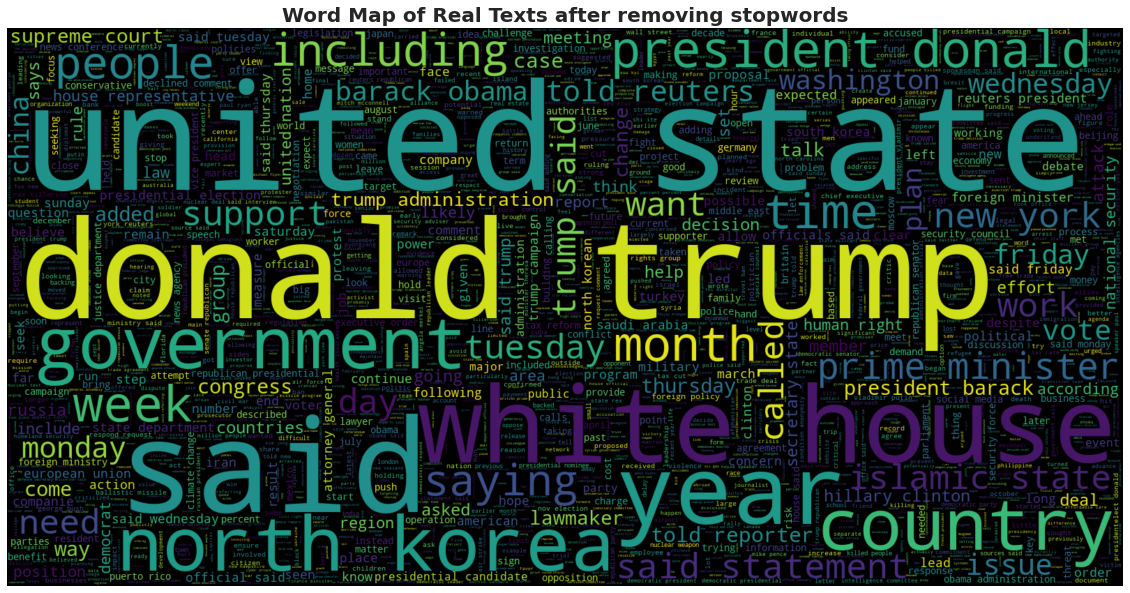

In [ ]:
# target = 1, Text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, 
               width = 1600, 
               height = 800).generate(" ".join(df[df.target == 1].text))

plt.imshow(wc, interpolation = 'bilinear')
plt.grid(None)
plt.axis('off')
plt.title("Word Map of Real Texts after removing stopwords", fontsize = 20, fontweight = "bold")
plt.show()

## Word Map of **Fake** Text **after** text remove stopwords

Text(0.5, 1.0, 'Word Map of Fake Texts after removing stopwords')

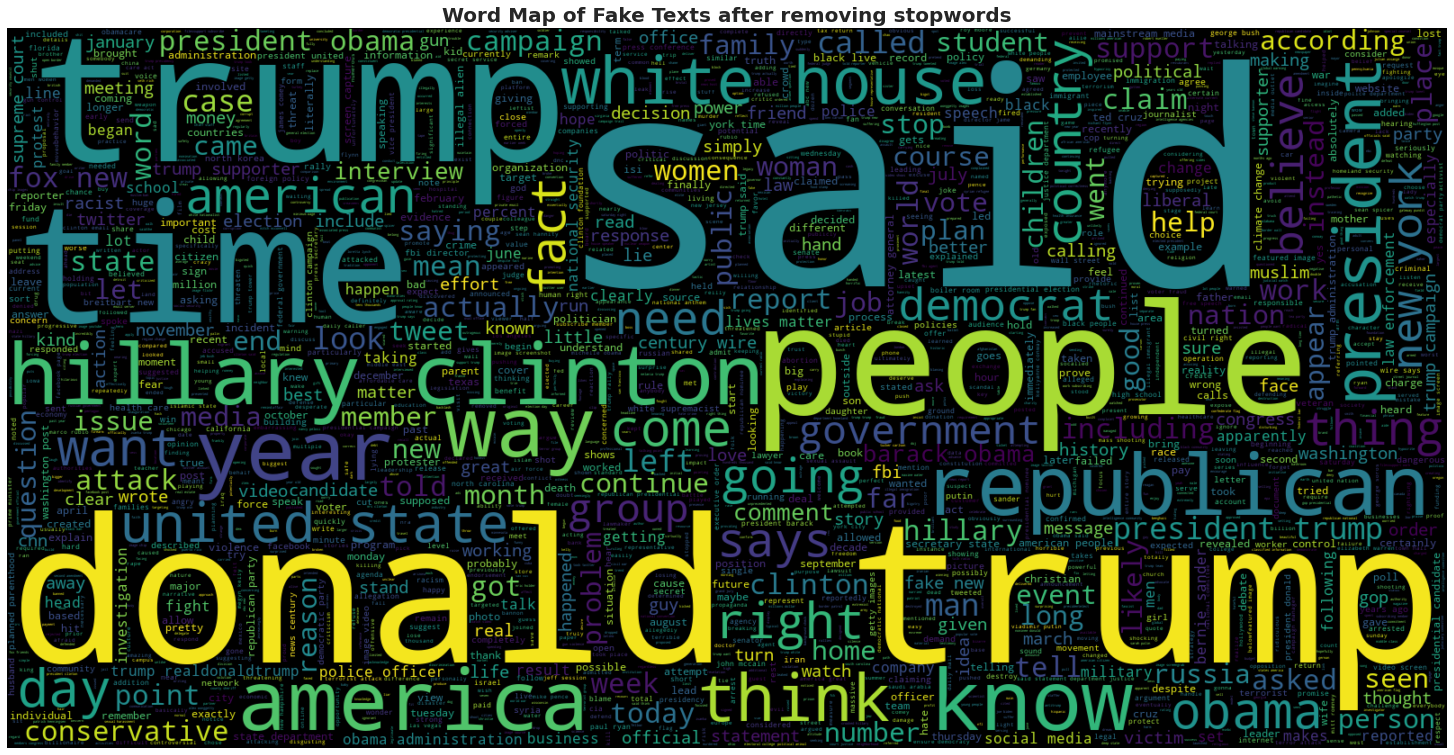

In [ ]:
# target = 0, Text that is Fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, 
               width = 1600, 
               height = 800).generate(" ".join(df[df.target == 0].text))
plt.imshow(wc, interpolation = 'bilinear')
plt.grid(None)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Map of Fake Texts after removing stopwords", fontsize = 20, fontweight = "bold")

### **Observations from the word map**
- **Donald Trump** & **United states** appears dominent in both Fake and Real news
- In fake news: **hillary clinton** is dominant but not as much in real news 

# Train and Test set split 
(80% training set, 20% test set)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state = 42)

In [ ]:
x_train.iloc[3]

'netanyahu lauds trumps iran turn sees chance change nuclear dealjerusalem reuters israeli prime minister benjamin netanyahu congratulated president donald trump speech iran friday seeing opportunity change nuclear deal tehran iranian conduct region trump boldly confronted iran terrorist regime created opportunity fix bad deal roll iran aggression confront criminal support terrorism netanyahu said facebook video'

**Insight on target:** We have a quite balanced dataset to build classifier with fake news slightly higher than real news

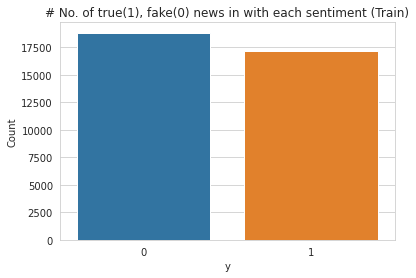

0    18812
1    17106
Name: target, dtype: int64


In [ ]:
sns.countplot(x= y_train, order = df['target'].value_counts(ascending=False).index)
plt.title('# No. of true(1), fake(0) news in with each sentiment (Train)')
plt.xlabel("y")
plt.ylabel("Count")
plt.show()
print(y_train.value_counts())

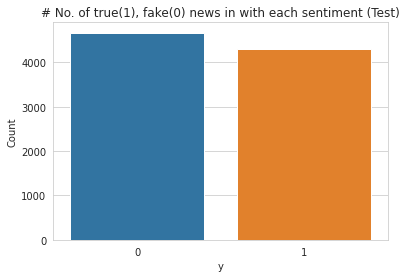

0    4669
1    4311
Name: target, dtype: int64


In [ ]:
sns.countplot(x= y_test, order = df['target'].value_counts(ascending=False).index)
plt.title('# No. of true(1), fake(0) news in with each sentiment (Test)')
plt.xlabel("y")
plt.ylabel("Count")
plt.show()
print(y_test.value_counts())

# Train Models
- Using traditional Statistical Methods
  - Reason: to start with traditional methods to see if this could already produce good results
- Training steps

> **Step 1:** use sklearn `CountVectorizer` to convert a collection of text documents to a matrix of token counts

> **Step 2:** use sklearn `TfidfTransformer` to transform the result from `CountVectorizer` (a count matrix) to a normalized tf or tf-idf representation. 

> **Step 3:** train the model. Here we trained LogisticRegression, MultiNomial Naive Bayes Classifier and RandomForest Classifier

Notes: TFIDF = Term Frequency Inverse Document Frequency: to quantify a word in documents. Computer a weight to each word to present its importance in the document/corpus







### 1st model: Logistic Regression Classifier
Logistic regression/Sigmoid function is the baseline for classifier tasks by drawing the threashold (default = 0.5) to do classification which classfy the target variable based on the probability. If the probablity is > 0.5 then classify it into "True News", otherwise "Fake News"


- The Logistic Regression Classifier prediction results:
  - F1 Score:    98.448
  - Accuracy:    98.508
  - Precision:   98.289
  - Recall:      98.608

F1 Score:    98.448
Accuracy:    98.508
Precision:   98.289
Recall:      98.608


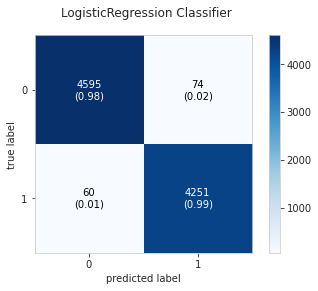

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4669
           1       0.98      0.99      0.98      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
from sklearn.linear_model import LogisticRegression
a = datetime.datetime.now()
pipe = Pipeline([
    ('vect',  CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',   LogisticRegression(random_state = 42))
])
model_LR = pipe.fit(x_train, y_train)
prediction = model_LR.predict(x_test)
score = metrics.accuracy_score(y_test, prediction)
score_per = metrics.precision_score(y_test, prediction)
score_re = metrics.recall_score(y_test, prediction)
score_F1 = metrics.f1_score(y_test, prediction)
print("F1 Score:    %0.3f" % (score_F1*100))
print("Accuracy:    %0.3f" % (score*100))
print("Precision:   %0.3f" % (score_per*100))
print("Recall:      %0.3f" % (score_re*100))

cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.suptitle('LogisticRegression Classifier')
plt.show()
b= datetime.datetime.now()
b - a
from sklearn import metrics
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, prediction, labels=[0, 1]))

In [ ]:
# Using CountVectorizer to the train data and store it at vect
vect = CountVectorizer().fit(x_train)
x_train_vectorized = vect.transform(x_train)
model_LR = LogisticRegression(random_state = 42)
model_LR.fit(x_train_vectorized, y_train)
predictions = model_LR.predict(vect.transform(x_test))

feature_names = np.array(vect.get_feature_names())
# Sort the coefficients from the model
sorted_coef_index = model_LR.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))
print('')
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))

Largest Coefs: 
['reuters' 'wednesday' 'factbox' 'thursday' 'tuesday' 'monday' 'friday'
 'graphic' 'nov' 'roundup']

Smallest Coefs:
['breaking' 'image' 'gop' 'images' 'watch' 'wire' 'adler' 'hillary' 'rep'
 'sen']



#### ROC-AUC Curve

In [ ]:
#Metrics libraries
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

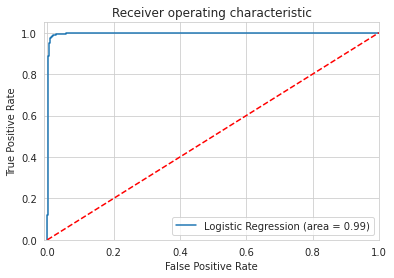

In [ ]:
logit_roc_auc = roc_auc_score(y_test, model_LR.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model_LR.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 2nd Model: Multinomial Naive Bayes Algorithm
- Naive Bayes classifier for multinomial models
- This algorithm considers the integer feature counts where it represents how ofen or how many times a specific word appears. 
- It is much suitable for the classification of discrete features such as word counts for classifying a text. 
- The prediction results:

  - F1 Score:    92.966
  - Accuracy:    93.241
  - Precision:   92.890
  - Recall:      93.041

F1 Score:    92.966
Accuracy:    93.241
Precision:   92.890
Recall:      93.041


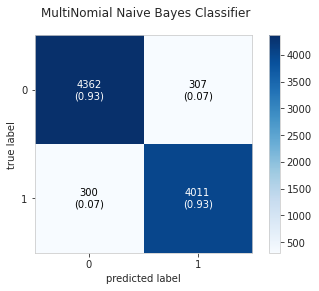

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4669
           1       0.93      0.93      0.93      4311

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [ ]:
from sklearn.naive_bayes import MultinomialNB
a=datetime.datetime.now()
pip_ln = Pipeline([
    ('vect',  CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',   MultinomialNB())
])
model_MultiNB = pip_ln.fit(x_train, y_train)
prediction = model_MultiNB.predict(x_test)
score = metrics.accuracy_score(y_test, prediction)
score_per = metrics.precision_score(y_test, prediction)
score_re = metrics.recall_score(y_test, prediction)
score_F1 = metrics.f1_score(y_test, prediction)
print("F1 Score:    %0.3f" % (score_F1*100))
print("Accuracy:    %0.3f" % (score*100))
print("Precision:   %0.3f" % (score_per*100))
print("Recall:      %0.3f" % (score_re*100))

cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.suptitle('MultiNomial Naive Bayes Classifier')
plt.show()
b= datetime.datetime.now()
b-a

from sklearn import metrics
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, prediction, labels=[0, 1]))

In [ ]:
# Using CountVectorizer to the train data and store it at vect
vect = CountVectorizer().fit(x_train)
x_train_vectorized = vect.transform(x_train)
model_MultiNB = MultinomialNB()
model_MultiNB.fit(x_train_vectorized, y_train)
predictions = model_MultiNB.predict(vect.transform(x_test))
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model_MultiNB.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))
print('')
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))

Largest Coefs: 
['said' 'trump' 'reuters' 'president' 'state' 'government' 'house'
 'states' 'new' 'republican']

Smallest Coefs:
['littles' 'nightsullah' 'nightstar' 'nightstand' 'nightstalker'
 'nightspot' 'nightspeaking' 'nightsneedless' 'nightshumpert' 'nightshe']



## 3rd model : Decision Tree Classifier
- Decision is a non-parametric machine learning model
- Decision tree has no underlying assumptions about the distribution of the data
- Decision is robust against outliers
- Decision is good for visualization
- The performance of Decision Tree Classifier
  - Accuracy:    97.728
  - Precision:   97.938
  - Recall:      97.246
  - F1 Score:    97.591

F1 Score:    97.717
Accuracy:    97.817
Precision:   98.151
Recall:      97.286


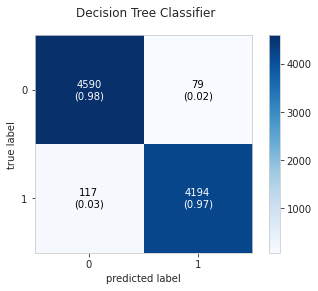

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4669
           1       0.98      0.97      0.98      4311

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [ ]:
from sklearn.tree import DecisionTreeClassifier
a = datetime.datetime.now()
pipe = Pipeline([
    ('vect',  CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',   DecisionTreeClassifier(random_state = 42))
])
model_DecisionTree = pipe.fit(x_train, y_train)
prediction = model_DecisionTree.predict(x_test)
score = metrics.accuracy_score(y_test, prediction)
score_per = metrics.precision_score(y_test, prediction)
score_re = metrics.recall_score(y_test, prediction)
score_F1 = metrics.f1_score(y_test, prediction)
print("F1 Score:    %0.3f" % (score_F1*100))
print("Accuracy:    %0.3f" % (score*100))
print("Precision:   %0.3f" % (score_per*100))
print("Recall:      %0.3f" % (score_re*100))

cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])
fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix(y_test, prediction),
                                show_absolute = True,
                                show_normed = True,
                                colorbar = True)
plt.suptitle('Decision Tree Classifier')
plt.show()
b= datetime.datetime.now()
b - a
from sklearn import metrics
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, prediction, labels=[0, 1]))

### Decision Tree Classifier Plots

In [ ]:
# Visualization on Decision Tree model to identify their decision rules on the top layers
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

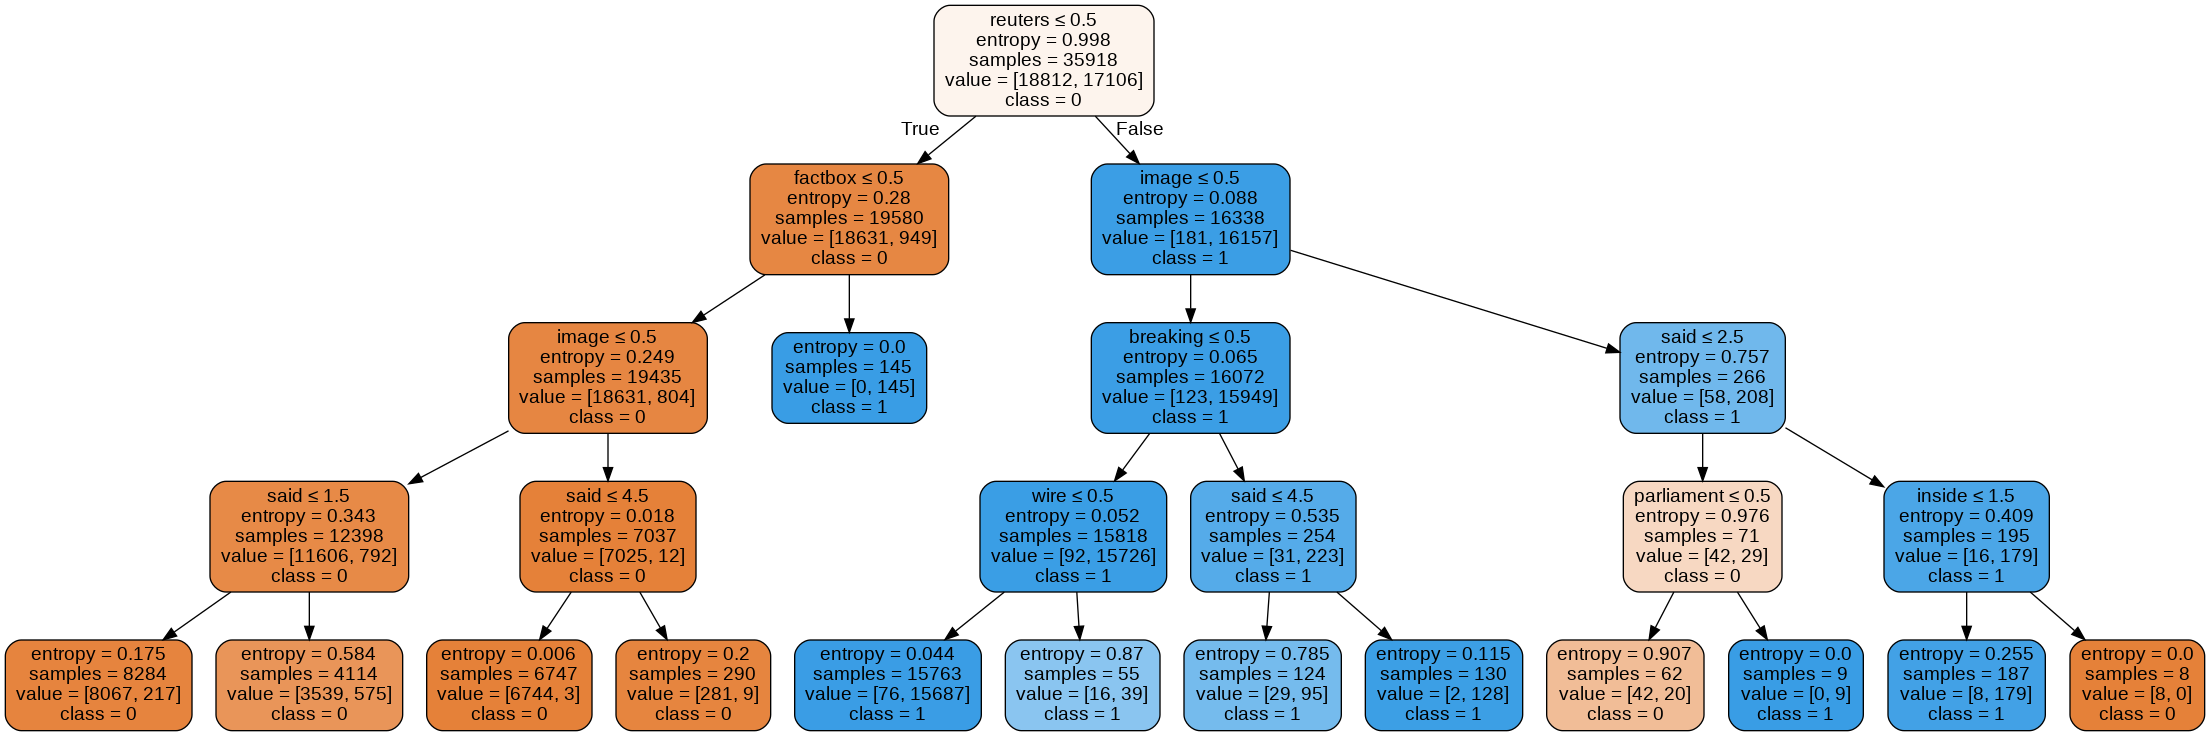

In [ ]:
vect = CountVectorizer().fit(x_train)
x_train_vectorized = vect.transform(x_train)
# choose only depth = 4 for better visualization purpose, to get the entire graph, could use max_depth = 20
model_DecisionTree = DecisionTreeClassifier(random_state = 42, criterion="entropy", max_depth = 4)
model_DecisionTree.fit(x_train_vectorized, y_train)
predictions = model_DecisionTree.predict(vect.transform(x_test))
feature_names = np.array(vect.get_feature_names())

dot_data = StringIO()
export_graphviz(model_DecisionTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('product_tier_pred_full.png')
Image(graph.create_png())

## Training results comparison table

| **Models** | **Reasons** | **F1 Score** | **Accuracy** |
|:-----|:----:|----:|----:|
| Logistic Regression | Baseline for Classification Task | 98.448 | 98.508 |
| MultiNomial Naive Bayes Classifier | suitable for the classification of discrete features such as word counts for classifying a text. | 92.966 | 93.241 |
| Decision Tree Classifier | Use a Tree based ,non-parametric model to compare, also for visualization purpose | 97.717 | 97.817 |  

# Summary

----

Algorithms: Logistic Regression, Multinomial Naive Bayes and Decision Tree Classifier

> Decide to start with Logistic Regression as a baseline model as a start point, then due to multinomial Naive Bayes considers the integer feature counts where it represents how ofen or how many times a specific word appears so we decide to train this as the 2nd model. After 2 parametric model, I decide to train 1 non-parametric model - Decision Tree as the 3rd model. 

> `Logistic Regression` appears to outperform the Multinomial Naive Bayes and Decision Tree classifier considering F1 score and Accuracy

> The Text provided is quite clean so without too much preprocessing could already achieve good results

- Training steps

  - **Step 1:** use sklearn `CountVectorizer` to convert a collection of text documents to a matrix of token counts

  - **Step 2:** use sklearn `TfidfTransformer` to transform the result from `CountVectorizer` (a count matrix) to a normalized tf or tf-idf representation. 

  - **Step 3:** train the model. 

> Above gives an initial result of fake and real news classifier and detail view. I am open to answer any questions if any. Thank you for your time and I look forward to talking more in detail with you.





# Sources
----

https://www.kaggle.com/ilaydadu/fake-news-detection-with-nlp-and-lstm

https://www.kaggle.com/atishadhikari/fake-news-cleaning-word2vec-lstm-99-accuracy

https://www.kaggle.com/paramarthasengupta/fake-news-detector-eda-prediction-99

https://www.kaggle.com/ahmadbakiernews-topics-classification-using-machine-learning

https://www.kaggle.com/benroshan/fake-news-classifier-lstm
